<a href="https://colab.research.google.com/github/nongquocdat/AI/blob/main/Mon_An_Vn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


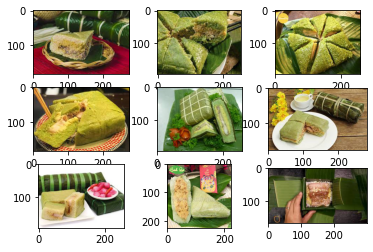

In [19]:
folder= '/content/drive/MyDrive/train/mon_an_vn/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'banhchung'+str(i+1)+'.jfif'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [20]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/train/mon_an_vn/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('banhchung'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('banhkhot'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('banhmi'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('banhxeo'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('bunbo'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('buncha'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('comtam'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('nem'):
    output = 7
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('goicuon'):
    output = 8
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('trungvitlon'):
    output = 9
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10foods_photos.npy', photos)
save('10foods_labels.npy', labels)

(45, 200, 200, 3) (45,)


In [22]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
history = model.fit(photos, labels, epochs=20, verbose=1)

Epoch 1/20
2/2 [==============================] - 4s 645ms/step - loss: 476.4013 - accuracy: 0.0444
Epoch 2/20
2/2 [==============================] - 2s 637ms/step - loss: 1775.4427 - accuracy: 0.2222
Epoch 3/20
2/2 [==============================] - 2s 659ms/step - loss: 499.8232 - accuracy: 0.3333
Epoch 4/20
2/2 [==============================] - 2s 648ms/step - loss: 133.4735 - accuracy: 0.4444
Epoch 5/20
2/2 [==============================] - 2s 649ms/step - loss: 81.5161 - accuracy: 0.2667
Epoch 6/20
2/2 [==============================] - 2s 657ms/step - loss: 4.2801 - accuracy: 0.7556
Epoch 7/20
2/2 [==============================] - 2s 644ms/step - loss: 13.1436 - accuracy: 0.7556
Epoch 8/20
2/2 [==============================] - 2s 663ms/step - loss: 3.1445 - accuracy: 0.8444
Epoch 9/20
2/2 [==============================] - 2s 642ms/step - loss: 0.0352 - accuracy: 0.9778
Epoch 10/20
2/2 [==============================] - 2s 641ms/step - loss: 0.1703 - accuracy: 0.9333
Epoch 11

In [24]:
model.evaluate(photos,labels)

2/2 [==============================] - 1s 287ms/step - loss: 2.9935e-04 - accuracy: 1.0000


[0.00029935044585727155, 1.0]

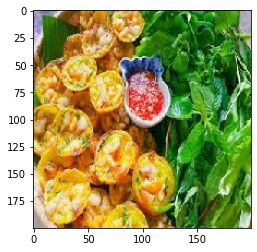

In [25]:
model.save('10Foods_Final.h5')
from keras.models import load_model
models=load_model('10Foods_Final.h5')
classes = ["banhchung","banhkhot","banhmi","banhxeo","bunbo","buncha","comtam","nem","goicuon","trungvitlon"]
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('banhkhot2.jfif', target_size=(200,200))
plt.imshow(img)

In [26]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.1379955  0.15723549 0.09507877 0.07519925 0.04735887 0.09910609
  0.07363255 0.11429757 0.10160794 0.09848791]]


'banhkhot'